# <span style="color:#FFD700">DIPESH SINGH<br> KCE080BCT008</span>

### <span style="color:#FFFF00">About Dataset</span>
Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

#### <span style="color:#FFFF00">Features</span>

* Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
* Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
* Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
* Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
* Engine Type: Understand the engine specifications, shedding light on performance and efficiency.
* Transmission: Determine the transmission type, whether automatic, manual, or another variant.
* Exterior & Interior Colors: Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
* Accident History: Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
* Clean Title: Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
* Price: Access the listed prices for each vehicle, aiding in price comparison and budgeting.<br>
<p>This dataset is a valuable resource for automotive enthusiasts, buyers, and researchers interested in analyzing trends, making informed purchasing decisions or conducting studies related to the automotive industry and consumer preferences. Whether you are a data analyst, car buyer, or researcher, this dataset offers a wealth of information to explore and analyze.</P>

In [455]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('used_cars.csv')


In [456]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


## <span style="color:#FFFF00">Data Cleaning</span>

In [457]:
import warnings
warnings.filterwarnings('ignore')

In [458]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [459]:
#filling null in accident column with 'None reported'
df['accident'].fillna('None reported',inplace=True)
#filling clean_title with 
df['clean_title'].fillna('No',inplace=True)
#removing rows with empty fuel  type
df.dropna(subset=['fuel_type'],inplace=True)



In [460]:
df.shape

(3839, 12)

In [461]:
df['brand'].unique()


array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar', 'Mercedes-Benz',
       'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia', 'Jeep',
       'Bentley', 'Honda', 'MINI', 'Porsche', 'Hummer', 'Chrysler',
       'Volvo', 'Cadillac', 'Lamborghini', 'Maserati', 'Volkswagen',
       'Subaru', 'GMC', 'RAM', 'Alfa', 'Ferrari', 'Scion', 'Mitsubishi',
       'Mazda', 'Saturn', 'Bugatti', 'Rolls-Royce', 'McLaren', 'Buick',
       'Lotus', 'Pontiac', 'FIAT', 'Saab', 'Mercury', 'Plymouth', 'smart',
       'Maybach', 'Suzuki'], dtype=object)

In [462]:
df["milage"]=df["milage"].str.replace(r'[^0-9]','',regex=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [463]:
df['fuel_type'].unique()
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [464]:
#filtering fuel type by not including inputs with ('-' & 'not supported')
df=df[~df["fuel_type"].isin(["-", "not supported"])]


In [465]:
plug_in_hybrid_data = df[df['fuel_type'] == 'Plug-In Hybrid']
plug_in_hybrid_data.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
60,Volvo,XC90 Hybrid T8 R-Design,2018,40000,Plug-In Hybrid,400.0HP 2.0L 4 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$42,000"
103,BMW,i8 Base,2019,41500,Plug-In Hybrid,369.0HP 1.5L 3 Cylinder Engine Plug-In Electri...,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,"$86,000"
124,Porsche,Cayenne E-Hybrid S,2016,96000,Plug-In Hybrid,416.0HP 3.0L V6 Cylinder Engine Plug-In Electr...,Transmission w/Dual Shift Mode,White,Red,At least 1 accident or damage reported,Yes,"$23,000"
239,Lincoln,Corsair Grand Touring,2021,1850,Plug-In Hybrid,266.0HP 2.5L 4 Cylinder Engine Plug-In Electri...,CVT Transmission,Silver,Beige,None reported,Yes,"$49,000"
293,BMW,i8 Base,2015,846,Plug-In Hybrid,357.0HP 1.5L 3 Cylinder Engine Plug-In Electri...,A/T,White,White,None reported,Yes,"$86,999"


In [466]:
df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
148.0HP 3.0L V6 Cylinder Engine Gasoline Fuel             1
134.0HP 1.8L 4 Cylinder Engine Plug-In Electric/Gas       1
362.0HP 5.4L 8 Cylinder Engine Gasoline Fuel              1
281.0HP 2.5L 4 Cylinder Engine Gasoline Fuel              1
139.0HP 1.6L 4 Cylinder Engine Gas/Electric Hybrid        1
Name: count, Length: 1096, dtype: int64

####  <span style="color:#779933">Extracting necessary features from engine</span>

In [467]:
df["horsepower"] = df["engine"].str.extract(r"(\d+\.?\d*)HP")
df["engine_size"] = df["engine"].str.extract(r"(\d+\.?\d*)L")
df["cylinders"] = df["engine"].str.extract(r"(\d+)\sCylinder")

In [468]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",NaN,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598",NaN,NaN,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999",NaN,2.0,NaN


In [469]:
df['brand'].value_counts()

brand
Ford             374
BMW              370
Mercedes-Benz    312
Chevrolet        287
Toyota           196
Audi             194
Porsche          192
Lexus            163
Jeep             143
Land             130
Nissan           111
Cadillac         106
RAM               91
GMC               90
Dodge             90
Kia               72
Hyundai           69
Acura             64
Mazda             64
Subaru            64
Honda             63
INFINITI          59
Volkswagen        56
Lincoln           52
Jaguar            47
Volvo             37
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
Scion              6
McLaren            6
Saturn             5
Lotus              4
FIAT               4
Mercury            3
Saab               2
Bugatti

In [470]:
df.dropna(subset=['horsepower','engine_size','cylinders'],inplace=True)
df.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders
4002,Mercedes-Benz,AMG GLS 63 4MATIC,2023,2000,Hybrid,603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,9-Speed A/T,Gray,Beige,None reported,Yes,"$175,000",603.0,4.0,8
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,"$25,900",241.0,2.0,4
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900",349.0,3.0,6
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999",450.0,3.5,6
4008,BMW,X3 xDrive30i,2020,43000,Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000",248.0,2.0,4


In [471]:
#since we have extracted all the necessary feature from the column 'engine' so we can now drop the engine column
df.drop(columns='engine',inplace=True)
df.head(3) 

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000",292.0,2.0,4


In [472]:
df['transmission'].value_counts()

transmission
A/T                               931
8-Speed A/T                       405
Transmission w/Dual Shift Mode    396
6-Speed A/T                       360
6-Speed M/T                       241
7-Speed A/T                       209
10-Speed A/T                      119
5-Speed A/T                        84
9-Speed A/T                        72
4-Speed A/T                        68
CVT Transmission                   62
5-Speed M/T                        53
M/T                                40
7-Speed M/T                        10
Transmission Overdrive Switch       7
Name: count, dtype: int64

In [473]:
df.shape

(3057, 14)

In [474]:
def group_transmission_type(trans):
    if 'A/T' in trans:
        return 'Automatic'
    elif 'M/T' in trans:
        return 'Manual'
    elif 'CVT' in trans:
        return 'CVT'
    elif 'w/Dual' in trans:
        return 'Dual'
    else:
        return 'Other'

# Apply the grouping function
df['transmission'] = df['transmission'].apply(group_transmission_type)
#transmission feature will only conatain (automatic,manual CVT and Dual)
df = df[~df['transmission'].isin(['Other'])]


In [475]:
df['transmission'].value_counts()

transmission
Automatic    2248
Dual          396
Manual        344
CVT            62
Name: count, dtype: int64

In [476]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",300.0,3.7,6
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,"$15,500",354.0,3.5,6
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,Automatic,Blue,Black,None reported,Yes,"$31,000",292.0,2.0,4
7,BMW,740 iL,2001,242000,Gasoline,Automatic,Green,Green,None reported,Yes,"$7,300",282.0,4.4,8
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,Automatic,Black,Black,None reported,Yes,"$41,927",311.0,3.5,6


In [477]:
df['accident'].value_counts()

accident
None reported                             2178
At least 1 accident or damage reported     872
Name: count, dtype: int64

In [478]:
df["price"]=df["price"].str.replace(r'[^0-9]','',regex=True)


In [479]:
df['clean_title'].value_counts()

clean_title
Yes    2970
No       80
Name: count, dtype: int64

In [480]:
df['ext_col'].value_counts()

ext_col
Black     787
White     713
Gray      434
Silver    335
Blue      307
Red       217
Green      61
Brown      43
Gold       41
Beige      37
Orange     35
Yellow     28
Purple     11
Pink        1
Name: count, dtype: int64

In [481]:
df['int_col'] = df['int_col'].replace('–', 'Black')


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3050 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3050 non-null   object
 1   model         3050 non-null   object
 2   model_year    3050 non-null   int64 
 3   milage        3050 non-null   object
 4   fuel_type     3050 non-null   object
 5   transmission  3050 non-null   object
 6   ext_col       3050 non-null   object
 7   int_col       3050 non-null   object
 8   accident      3050 non-null   object
 9   clean_title   3050 non-null   object
 10  price         3050 non-null   object
 11  horsepower    3050 non-null   object
 12  engine_size   3050 non-null   object
 13  cylinders     3050 non-null   object
dtypes: int64(1), object(13)
memory usage: 357.4+ KB


In [483]:
dulicated_data = df.duplicated()
print(dulicated_data.sum())

0


In [484]:
df['accident'] = df['accident'].apply(lambda x: 1 if x != 'None reported' else 0)

# Converting 'clean_title' to binary, treating missing values as 0
df['clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)

#### <span style="color:#779933">Converting the data type</span>

In [485]:
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')
df['model'] = df['model'].astype(str)
df['fuel_type'] = df['fuel_type'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['ext_col'] = df['ext_col'].astype('category')
df['int_col'] = df['int_col'].astype('category')
df['accident'] = pd.to_numeric(df['accident'], errors='coerce')
df['clean_title'] = pd.to_numeric(df['clean_title'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')


##  <span style="color:#FFFF00">EDA</span>

In [486]:
df.describe()

,model_year,milage,accident,clean_title,price,horsepower,engine_size,cylinders
count,3050.000000,3050.000000,3050.000000,3050.000000,3.050000e+03,3050.000000,3050.000000,3050.000000
mean,2014.385574,73293.679016,0.285902,0.973770,3.828222e+04,326.529180,3.734033,6.250820
std,5.879086,53441.932146,0.451917,0.159843,7.104403e+04,113.528598,1.412271,1.674096
min,1996.000000,100.000000,0.000000,0.000000,2.000000e+03,70.000000,1.000000,3.000000
25%,2011.000000,31685.750000,0.000000,1.000000,1.500000e+04,247.000000,2.500000,5.000000
50%,2016.000000,64500.000000,0.000000,1.000000,2.727500e+04,310.000000,3.500000,6.000000
75%,2019.000000,103797.500000,1.000000,1.000000,4.600000e+04,400.000000,4.700000,8.000000
max,2024.000000,405000.000000,1.000000,1.000000,2.954083e+06,808.000000,8.400000,12.000000


#### <span style="color:#779933">Visualzation for outliers</span>

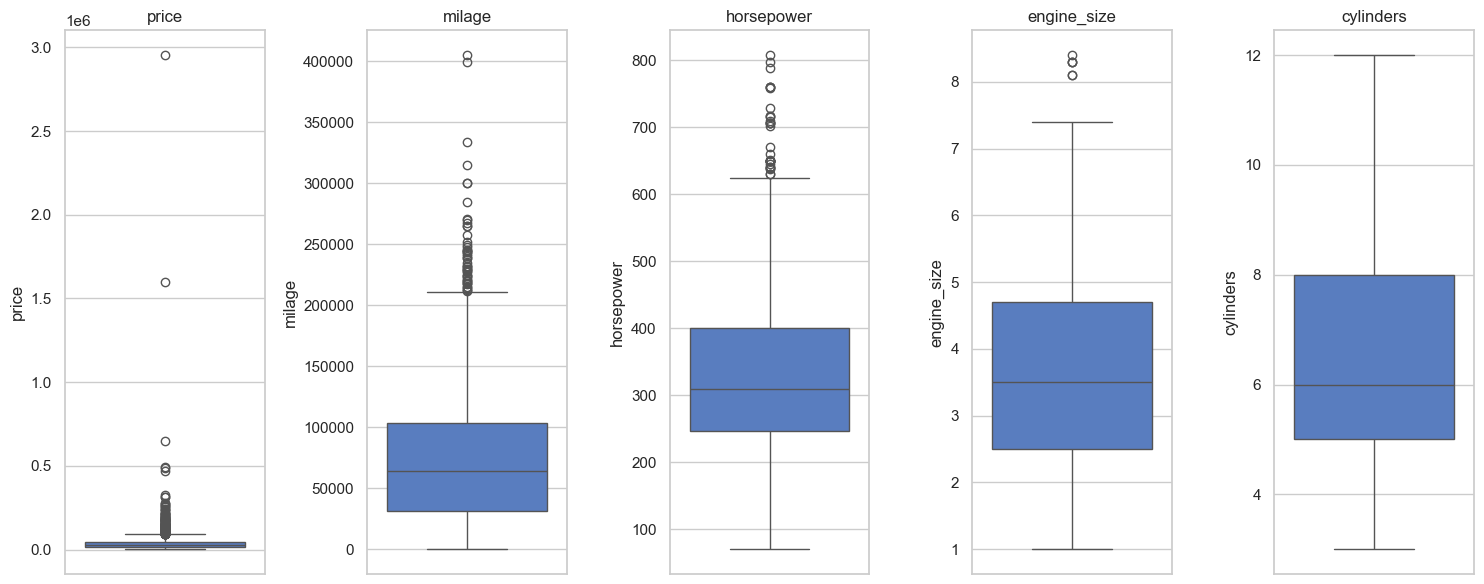

In [487]:
num_cols = ["price", "milage", "horsepower", "engine_size", "cylinders"]

# Create boxplots for each numerical column
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [488]:
print(df['price'].min())
print(df['price'].max())

2000
2954083


### <span style="color:#779933"> Handling outliers </span>

In [489]:
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_capped

# Apply capping on selected numerical columns
df_capped = cap_outliers_iqr(df, num_cols)

# Display summary statistics after capping
df_capped.describe()

,model_year,milage,accident,clean_title,price,horsepower,engine_size,cylinders
count,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000,3050.000000
mean,2014.385574,72693.988893,0.285902,0.973770,33673.704918,325.823115,3.733541,6.250820
std,5.879086,51373.224950,0.451917,0.159843,24118.900986,111.290179,1.410732,1.674096
min,1996.000000,100.000000,0.000000,0.000000,2000.000000,70.000000,1.000000,3.000000
25%,2011.000000,31685.750000,0.000000,1.000000,15000.000000,247.000000,2.500000,5.000000
50%,2016.000000,64500.000000,0.000000,1.000000,27275.000000,310.000000,3.500000,6.000000
75%,2019.000000,103797.500000,1.000000,1.000000,46000.000000,400.000000,4.700000,8.000000
max,2024.000000,211965.125000,1.000000,1.000000,92500.000000,629.500000,8.000000,12.000000


### <span style="color:#9b59b6">Univeriate analysis: <br>Analyzing the distibution of numerical features</span>

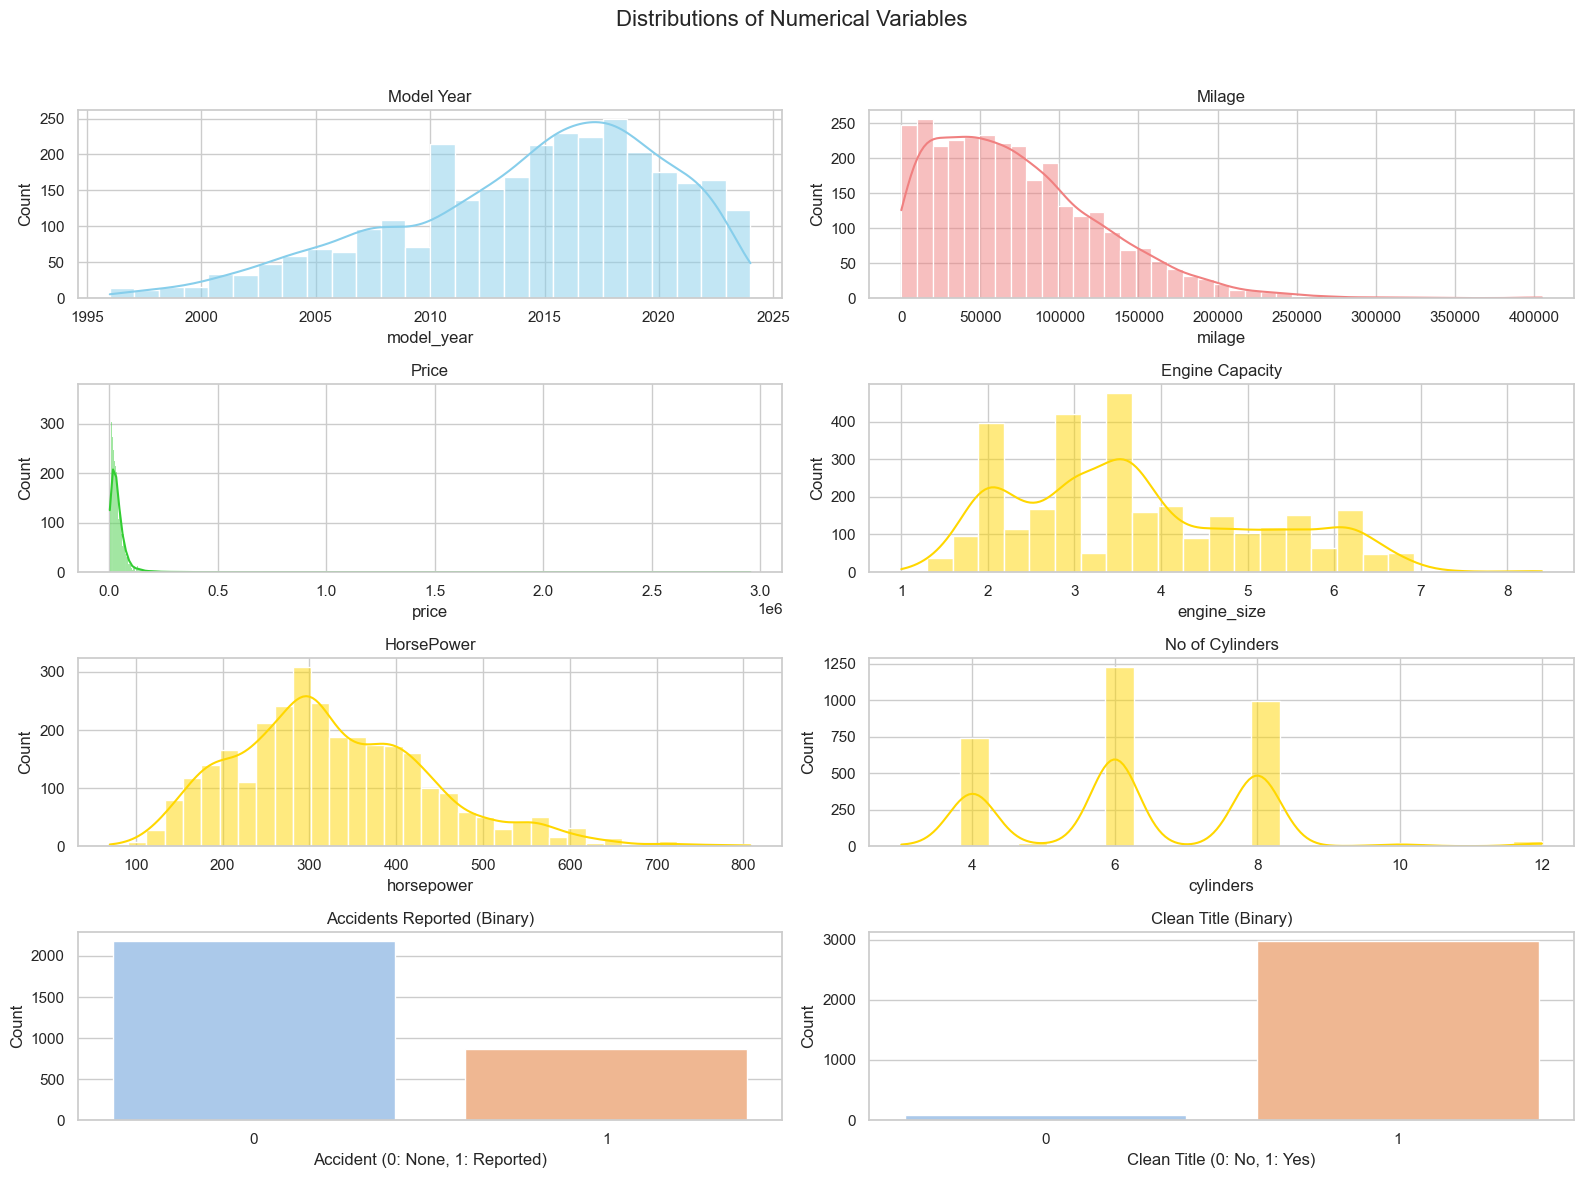

In [490]:
# Set up the plotting style
sns.set(style="whitegrid", palette="muted")

# 1. Visualize distributions for numerical variables
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.suptitle('Distributions of Numerical Variables', fontsize=16)

# Model Year
sns.histplot(df['model_year'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Model Year')

# Milage
sns.histplot(df['milage'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Milage')

# Price
sns.histplot(df['price'], kde=True, ax=axes[1, 0], color='limegreen')
axes[1, 0].set_title('Price')

# Engine Capacity
sns.histplot(df['engine_size'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Engine Capacity')

# Horse Power
sns.histplot(df['horsepower'], kde=True, ax=axes[2, 0], color='gold')
axes[2, 0].set_title('HorsePower')

# Cylinders
sns.histplot(df['cylinders'], kde=True, ax=axes[2, 1], color='gold')
axes[2, 1].set_title('No of Cylinders')

# Accident 
sns.countplot(x=df['accident'], ax=axes[3, 0], palette="pastel")
axes[3, 0].set_title('Accidents Reported (Binary)')
axes[3, 0].set_xlabel('Accident (0: None, 1: Reported)')
axes[3, 0].set_ylabel('Count')


# Clean Title B
sns.countplot(x=df['clean_title'], ax=axes[3, 1], palette="pastel")
axes[3, 1].set_title('Clean Title (Binary)')
axes[3, 1].set_xlabel('Clean Title (0: No, 1: Yes)')
axes[3, 1].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<span style="color:#00ffff">Model Year:</span>

* The majority of cars in the dataset are recent models, with a peak around 2015–2020.
* Older model years are relatively rare, especially before 2000.
* The distribution is skewed toward newer vehicles, reflecting a focus on more recent cars.

<span style="color:#00ffff">Mileage:</span>


* Mileage distribution is right-skewed, with most vehicles having lower mileage (under 100,000).
* A small number of vehicles have very high mileage, up to 400,000.
* This indicates that the dataset contains a mix of lightly and heavily used vehicles, though newer models dominate.

<span style="color:#00ffff">Price:</span>


* Price distribution is highly right-skewed, with most vehicles priced in the lower range.
* There are a few very high-priced vehicles, indicating the presence of luxury or high-end cars.
* The majority of prices fall under $1 million, with only a few outliers in the range above.

<span style="color:#00ffff">Engine Capacity (Size):</span>


* The engine capacity distribution shows multiple peaks, with many vehicles having engines around 2.0, 3.0, and 4.0 liters.
* Larger engine sizes (above 6 liters) are less common, indicating fewer high-performance or specialty vehicles.
* This suggests a variety of vehicle types, from economy to performance-oriented cars.

<span style="color:#00ffff">Horsepower:</span>

* Horsepower distribution is slightly right-skewed, with a peak around 200–300 horsepower.
* Vehicles with very high horsepower (above 500) are rare, suggesting fewer sports or luxury cars.
* The data suggests that most vehicles have moderate power suitable for everyday use.

<span style="color:#00ffff">Number of Cylinders:</span>


* The distribution shows distinct peaks, corresponding to vehicles with 4, 6, and 8 cylinders.
* 4-cylinder engines are the most common, followed by 6-cylinder and 8-cylinder engines.
* This reflects the popularity of compact, mid-size, and performance vehicles in the dataset.

<span style="color:#00ffff">Accidents Reported (Binary):</span>


* Most vehicles in the dataset have no reported accidents (category 0).
* A smaller portion of vehicles have reported accidents (category 1), indicating that the dataset is predominantly composed of accident-free cars.

<span style="color:#00ffff">Clean Title (Binary):</span>

* A vast majority of vehicles have a clean title (category 1), signifying no major issues like salvage or rebuilt status.
Only a very small number of vehicles have non-clean titles (category 0), suggesting they are exceptions in this dataset.

## <span style="color:#00ff00">Univeriate analysis:</span>
#### <span style="color:#00ffff">Analyzing the distibution of categorical features</span>




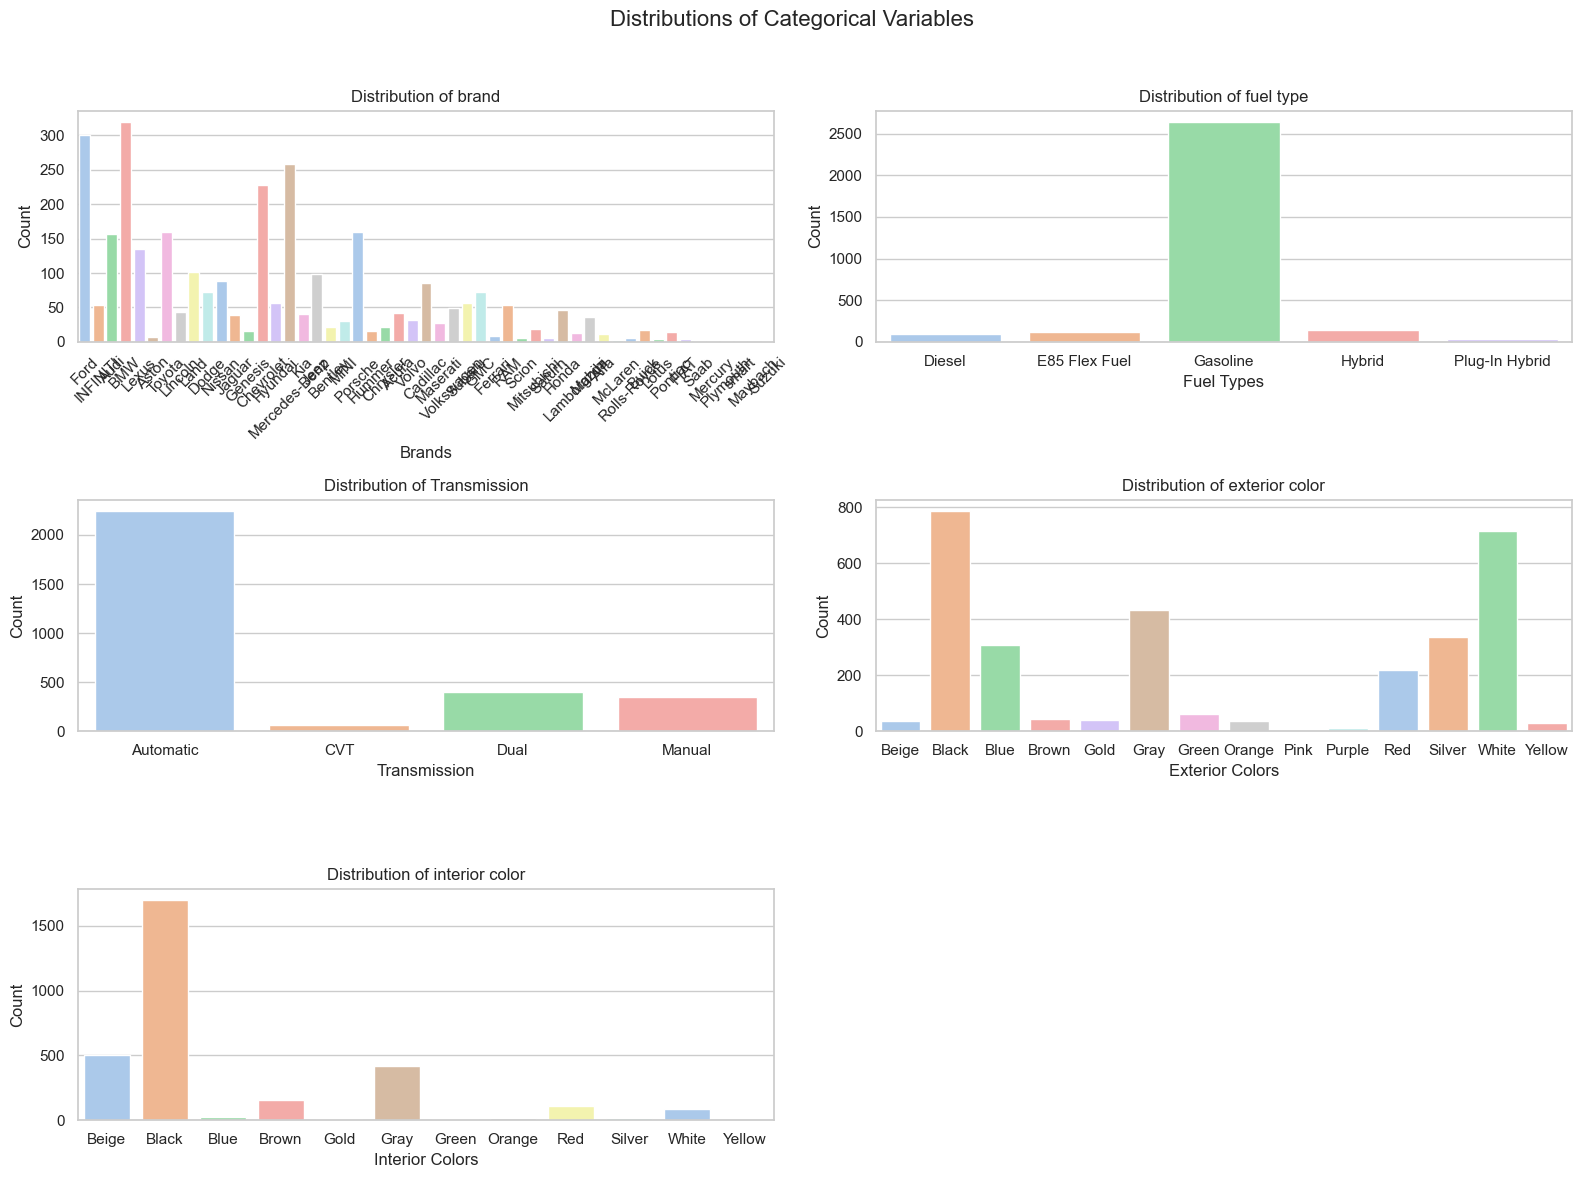

In [491]:
# Visualize distributions for categorical variables
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Distributions of Categorical Variables', fontsize=16)

# Distribution of brand
sns.countplot(x=df['brand'], ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title('Distribution of brand')
axes[0, 0].set_xlabel('Brands')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Distribution of fuel type
sns.countplot(x=df['fuel_type'], ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title('Distribution of fuel type')
axes[0, 1].set_xlabel('Fuel Types')
axes[0, 1].set_ylabel('Count')

# Distribution of transmission
sns.countplot(x=df['transmission'], ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title('Distribution of Transmission')
axes[1, 0].set_xlabel('Transmission')
axes[1, 0].set_ylabel('Count')

# Distribution of exterior color
sns.countplot(x=df['ext_col'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title('Distribution of exterior color')
axes[1, 1].set_xlabel('Exterior Colors')
axes[1, 1].set_ylabel('Count')

# Distribution of interior color
sns.countplot(x=df['int_col'], ax=axes[2, 0], palette="pastel")
axes[2, 0].set_title('Distribution of interior color')
axes[2, 0].set_xlabel('Interior Colors')
axes[2, 0].set_ylabel('Count')

# Turn off the last unused subplot (axes[2, 1])
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<span style="color:#00ffff">Distribution of Brand:</span>


* The dataset includes a variety of car brands.
* Some brands, such as Ford, BMW, and Toyota, have significantly higher counts compared to others like Rolls-Royce and Maybach.
* The distribution is heavily skewed toward a few popular brands, indicating their dominance in the dataset.

<span style="color:#00ffff">Distribution of Fuel Type:</span>


* Gasoline is the most common fuel type, dominating the dataset by a large margin.
* Other fuel types like Diesel, Hybrid, and E85 Flex Fuel have relatively fewer counts.
* Plug-In Hybrid appears to be the least frequent category.

<span style="color:#00ffff">Distribution of Transmission:</span>


* The majority of cars have Automatic transmissions, indicating its popularity or prevalence.
* Other types of transmissions, like Dual and Manual, have similar but much lower counts compared to automatic.
* CVT transmission is the least frequent in the dataset.

<span style="color:#00ffff">Distribution of Exterior Color:</span>


* The most common exterior colors are White, Black, and Silver, reflecting their popularity in the market.
* Less common colors include Orange, Purple, and Pink.
* There is a noticeable drop-off in frequency for non-neutral colors, indicating buyer preference for neutral shades.

<span style="color:#00ffff">Distribution of Interior Color:</span>


* Black interiors dominate the dataset, far outnumbering other colors.
* Gray is the second most common interior color.
* Bright or uncommon colors like Yellow, Orange, and Red are rare for interiors, reflecting a tendency toward more subdued interior color choices.

## <span style="color:#00ff00">Bivariate analysis</span>



### <span style="color:#00ffff">1.Numerical vs Numerical:</span>
<span style="color:#00ffff">Computing correlation coefficients.</span>


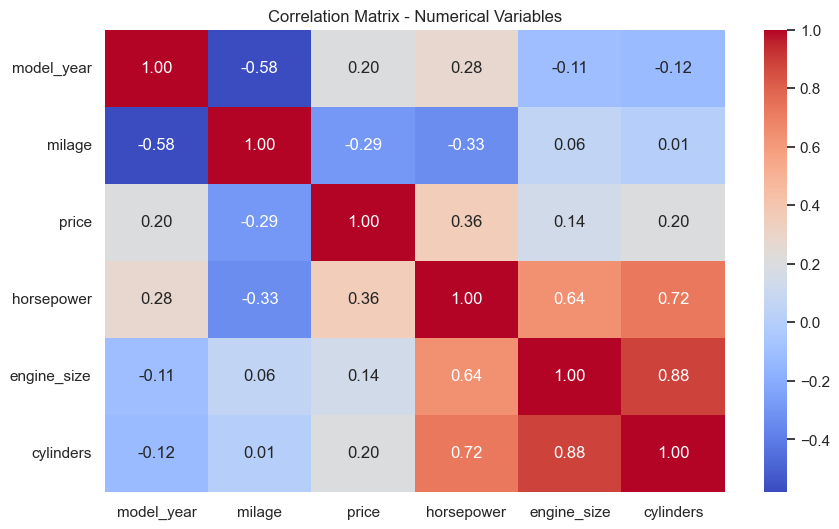

In [492]:
# 1. Numerical vs Numerical Analysis - Correlation Matrix
correlation_matrix = df[['model_year', 'milage', 'price', 'horsepower', 'engine_size', 'cylinders']].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix - Numerical Variables')
plt.show()

<span style="color:#00ffff">Observations from Correlation Matrix:</span>


<span style="color:#ff00ff">Strong Positive Correlations:</span>


* size and cylinders (𝑟=0.88).
* horsepower and cylinders (𝑟=0.72).
* horsepower and size (𝑟=0.64).

<span style="color:#ff00ff">Negative Correlations:</span>


* milage and model_year (𝑟=−0.58), indicating newer models tend to have lower mileage.

<span style="color:#ff00ff">Moderate Positive Correlations:</span>


* price and horsepower (𝑟=0.36).
* price and cylinders (𝑟=0.20).

#### <span style="color:#00ffff">Scatter plots for numerical variables.</span>


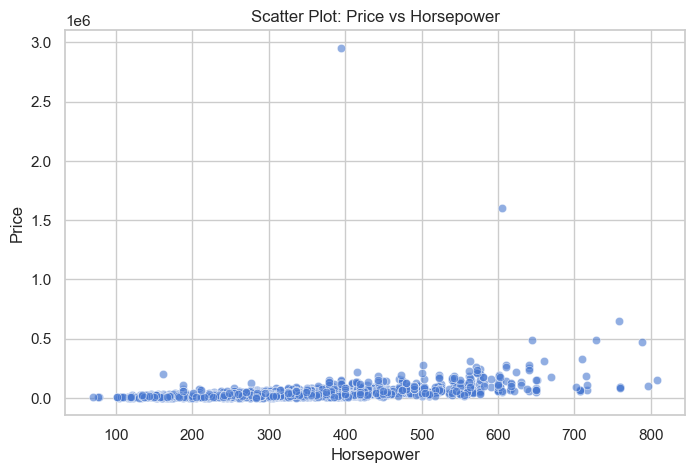

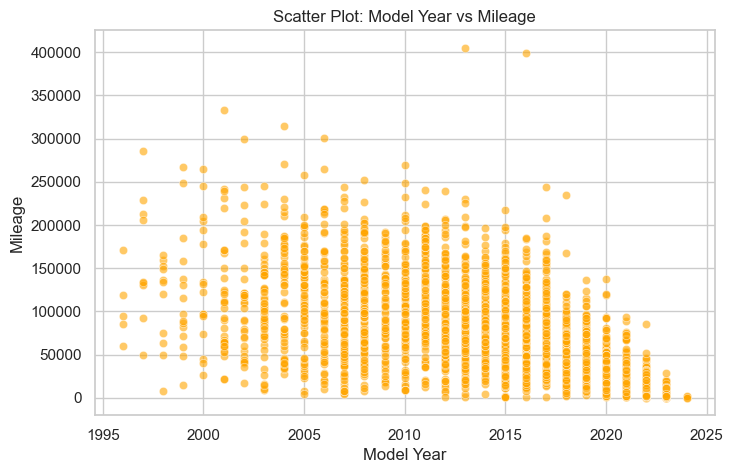

In [493]:
# 2. Scatter Plots for Numerical vs Numerical Relationships

# Scatter plot: Price vs Horsepower
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='horsepower', y='price', alpha=0.6)
plt.title('Scatter Plot: Price vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

# Scatter plot: Model Year vs Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='model_year', y='milage', alpha=0.6, color='orange')
plt.title('Scatter Plot: Model Year vs Mileage')
plt.xlabel('Model Year')
plt.ylabel('Mileage')
plt.show()

<span style="color:#00ffff">Observations from Scatter Plots: </span><br>
Price vs. Horsepower:

There is a general trend of increasing price with horsepower, but the relationship is not very strong due to outliers and a spread of prices for similar horsepower levels.
High-end cars with higher horsepower are priced significantly higher.
Model Year vs. Mileage:

A clear negative relationship is observed: newer models tend to have lower mileage.
Older models (before 2010) show a wide range of mileage, while newer models are concentrated at lower mileage values.


### <span style="color:#00ffff">2. Categorical vs Numerical Analysis</span>


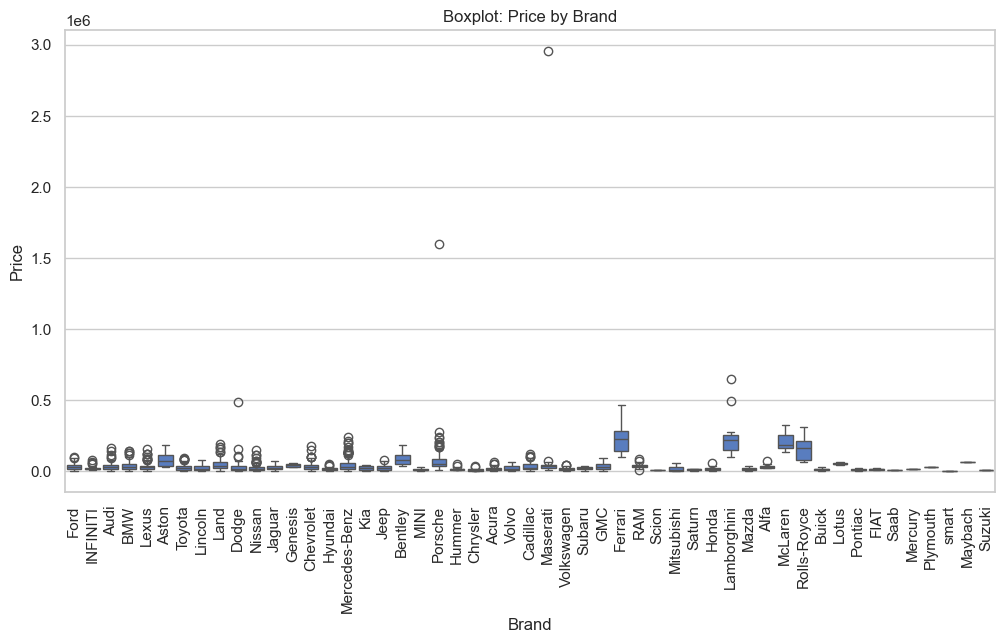

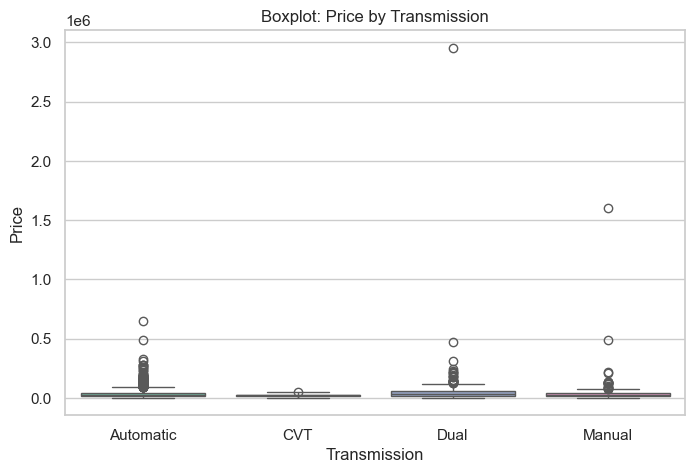

In [494]:
# 3. Boxplots for Categorical vs Numerical Analysis

# Boxplot: Price by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand', y='price')
plt.xticks(rotation=90)
plt.title('Boxplot: Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

# Boxplot: Price by Transmission
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='transmission', y='price', palette="Set2")
plt.title('Boxplot: Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

<span style="color:#00ffff">Observations from Boxplots:</span><br>
<span style="color:#ff00ff">Price by Brand:</span>

Brands like Rolls-Royce, McLaren, Lamborghini, and Bentley have the highest price ranges, indicating luxury vehicles.
Popular brands like Toyota, Honda, and Ford exhibit relatively lower and more consistent price ranges.

<span style="color:#ff00ff">Price by Transmission:</span>


Cars with Dual (dual-clutch transmission) tend to have higher price ranges, likely due to their advanced technology and association with performance vehicles.
Manual and CVT (Continuously Variable Transmission) show lower price ranges on average.

### <span style="color:#00ffff">3. Categorical vs Categorical Relationships</span>

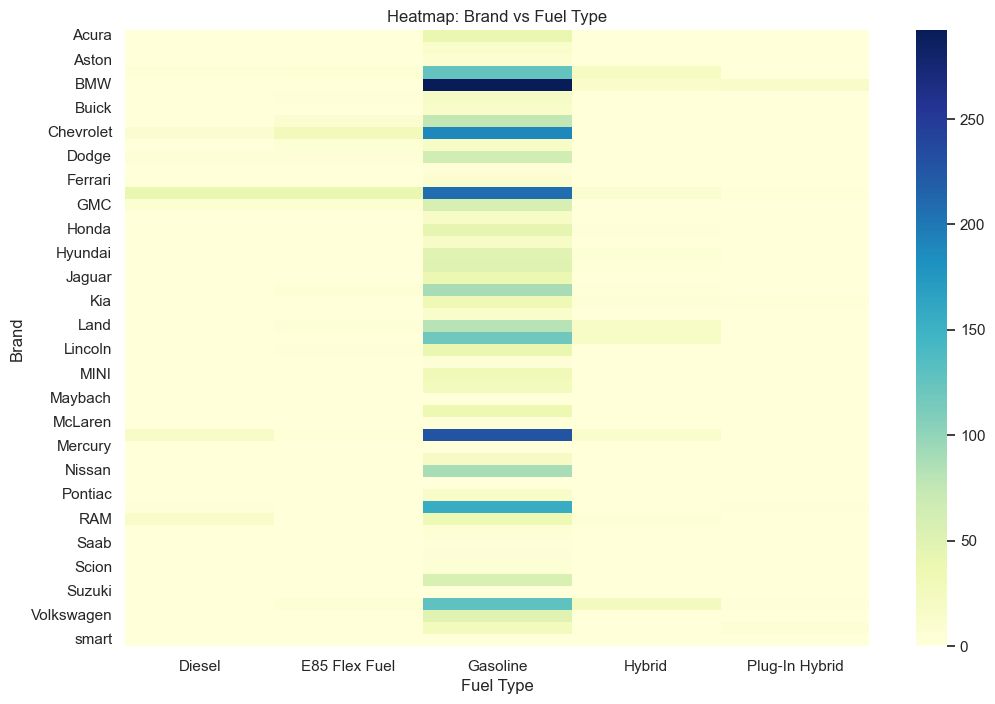

In [495]:
# 4. Categorical vs Categorical Analysis - Contingency Table and Visualization

# Contingency Table: Brand vs Fuel Type
contingency_table = pd.crosstab(df['brand'], df['fuel_type'])

# Visualize as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Heatmap: Brand vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Brand')
plt.show()

#### <span style="color:#00ffff">Observations from Brand vs Fuel Type Heatmap:</span><br>
<span style="color:#ff00ff">Gasoline Dominance:</span>

Most brands primarily use Gasoline as the fuel type. Brands like BMW, Mercedes-Benz, and Audi have the highest counts of gasoline-fueled cars.

<span style="color:#ff00ff">Diesel and Flex-Fuel Usage:</span>


Brands such as Ford, RAM, and Chevrolet have a notable presence of Diesel and E85 Flex Fuel vehicles.
Mercedes-Benz and Audi also have some Diesel models.

<span style="color:#ff00ff">Hybrid and Plug-In Hybrid:</span>


Toyota has the highest number of Hybrid models, followed by Lexus.
Plug-in hybrids are relatively rare, seen mainly in BMW, Toyota, and Volvo.

## <span style="color:#00ff00">EDA tasks as assigned:</span>

### <span style="color:#00ff00">1. Price Analysis Based on Car Features</span>


#### <span style="color:#00ffff">Price vs. Mileage (milage)</span>

* Analyze the relationship between milage and price for different fuel
type and engine types.
*  Identify if cars with higher mileage are priced significantly lower.

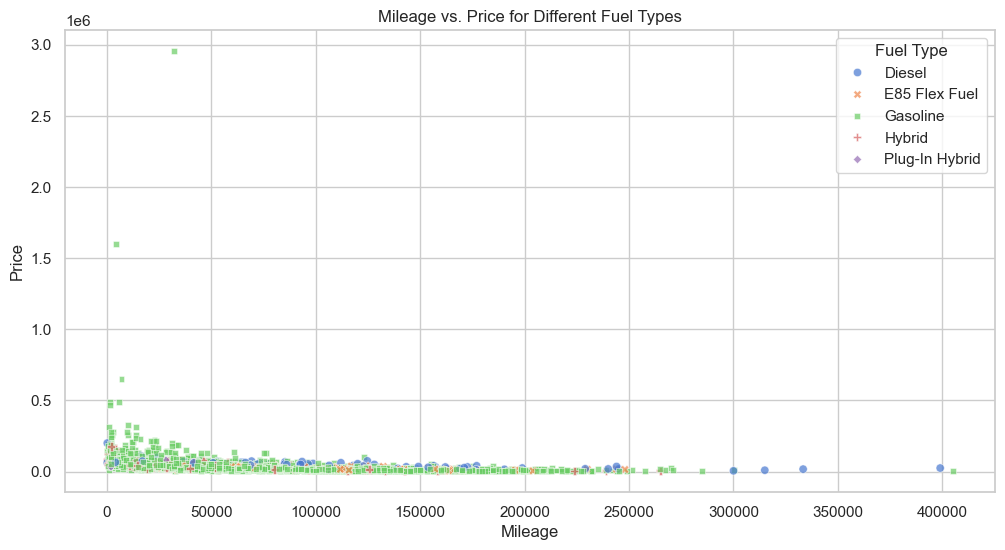

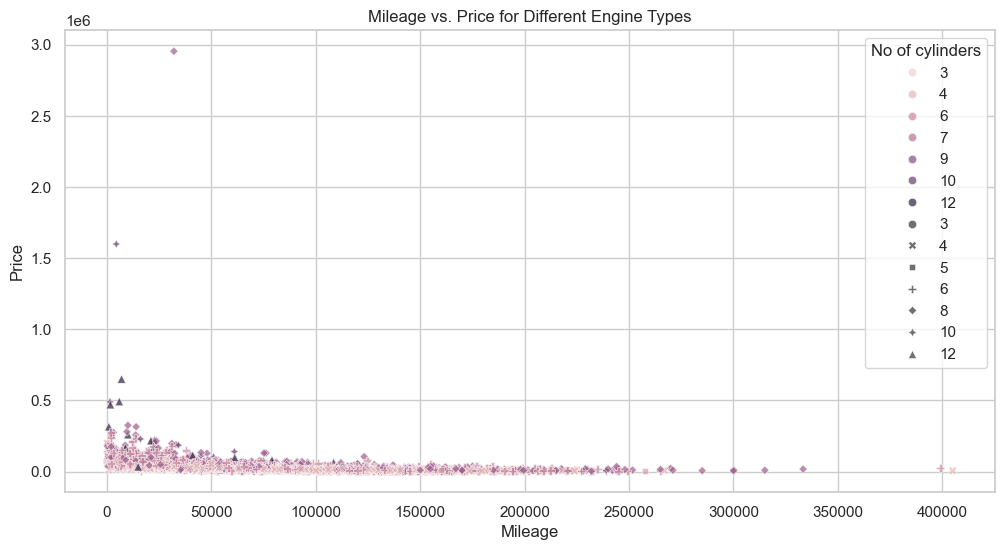

In [496]:
# Visualization: Mileage vs. Price for different Fuel Types
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='milage', y='price', hue='fuel_type', style='fuel_type', alpha=0.7)
plt.title('Mileage vs. Price for Different Fuel Types')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()

# Visualization: Mileage vs. Price for different Engine Types
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='milage', y='price', hue='cylinders', style='cylinders', alpha=0.7)
plt.title('Mileage vs. Price for Different Engine Types')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='No of cylinders')
plt.grid(True)
plt.show()

<span style="color:#ff00ff">Overall Trend:</span>As mileage increases, vehicle prices generally decrease, indicating depreciation with higher usage.

<span style="color:#ff00ff">Fuel Types:</span> The plot shows distinct clusters for different fuel types:

<span style="color:#ff00ff">Gasoline (Green Squares):</span> The most frequent and widely spread across all mileage ranges, with prices generally clustered at lower levels.

<span style="color:#ff00ff">Diesel (Blue Circles): </span>Some higher-priced outliers, especially at lower mileage.

<span style="color:#ff00ff">Hybrid (Pink Crosses) and Plug-In Hybrid (Purple Diamonds):</span>Scattered in lower price ranges, indicating niche use.

<span style="color:#ff00ff">E85 Flex Fuel (Orange Stars):</span>Limited data points, concentrated in lower mileage and price ranges.

<span style="color:#ff00ff">Outliers:</span> There are several high-price outliers, particularly for lower mileage, which may represent luxury or high-demand vehicles.

<span style="color:#ff00ff">Mileage Cap:</span> Most data points are below 300,000 miles, with very few vehicles exceeding this mileage.

### <span style="color:#00ffff">Price Variability by Brand and Model</span>
* Compare price distribution for different brands and models.
* Identify top brands and models with higher price stability or price
fluctuations.

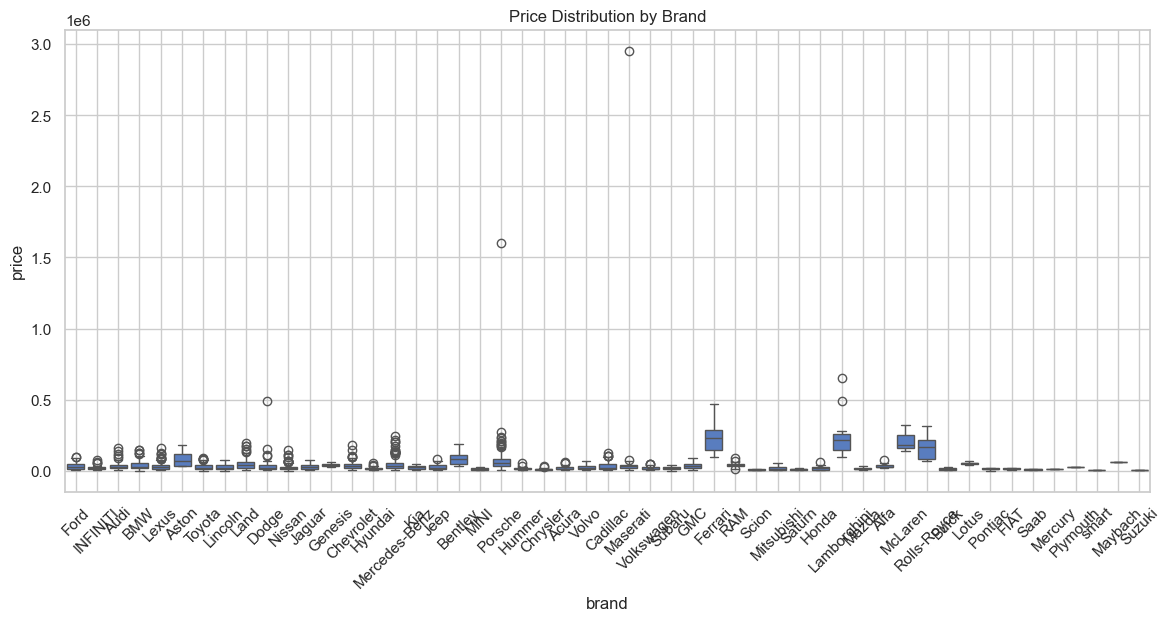

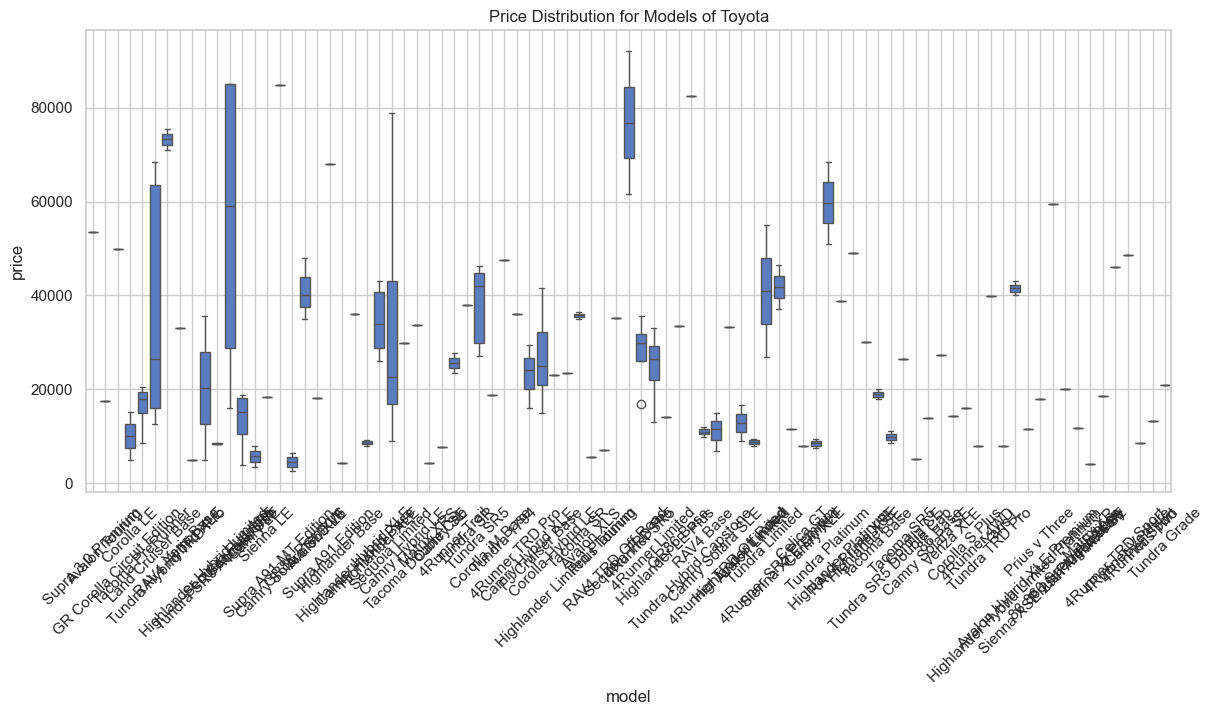

In [497]:

# Compare Price Distribution for Different Brands
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='brand', y='price')
plt.title('Price Distribution by Brand')
plt.xlabel('brand')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Compare Price Distribution for Different Models within a Brand
brand_to_visualize = 'Toyota'  # Replace with the brand you want to analyze
brand_data = df[df['brand'] == brand_to_visualize]

plt.figure(figsize=(14, 6))
sns.boxplot(data=brand_data, x='model', y='price')
plt.title(f'Price Distribution for Models of {brand_to_visualize}')
plt.xlabel('model')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### <span style="color:#00ffff">Observations:</span>

<span style="color:#ff00ff">Brands with Higher Price Stability:</span>

* Brands like Ford, Toyota, Honda, and Nissan have relatively compact box plots, suggesting that their prices are concentrated within a smaller range, indicating higher stability.
* These brands also show fewer or no extreme outliers, further supporting their price consistency.

<span style="color:#ff00ff">Brands with Higher Price Fluctuations:</span>

* Brands like Ferrari, Lamborghini, Rolls-Royce, and McLaren have wide box plots and numerous outliers, reflecting significant price variation.
* Luxury and exotic brands tend to have higher price ranges due to different vehicle trims and customization options, explaining their fluctuations.

<span style="color:#ff00ff">Outliers:</span>

* A few brands, such as Porsche and Mercedes-Benz, also show significant outliers, indicating that while the bulk of their models fall within a certain price range, some are exceptionally expensive.

#### <span style="color:#00ffff">Fuel Type and Engine's Impact on Price</span>

* Analyze the price distribution of cars based on fuel type (e.g., petrol,
diesel, electric).
* Compare cars with different engine sizes and their impact on price.

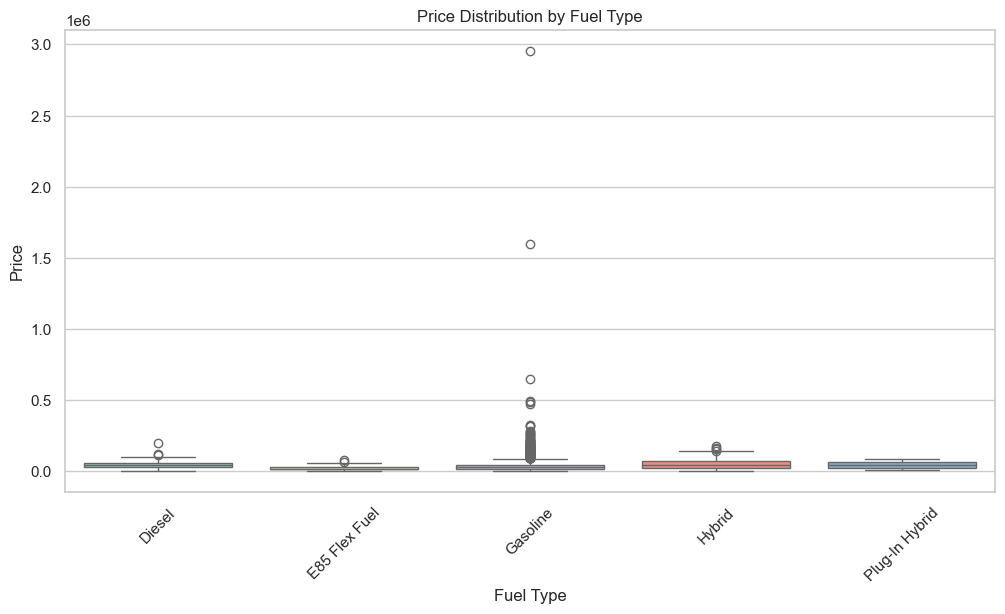

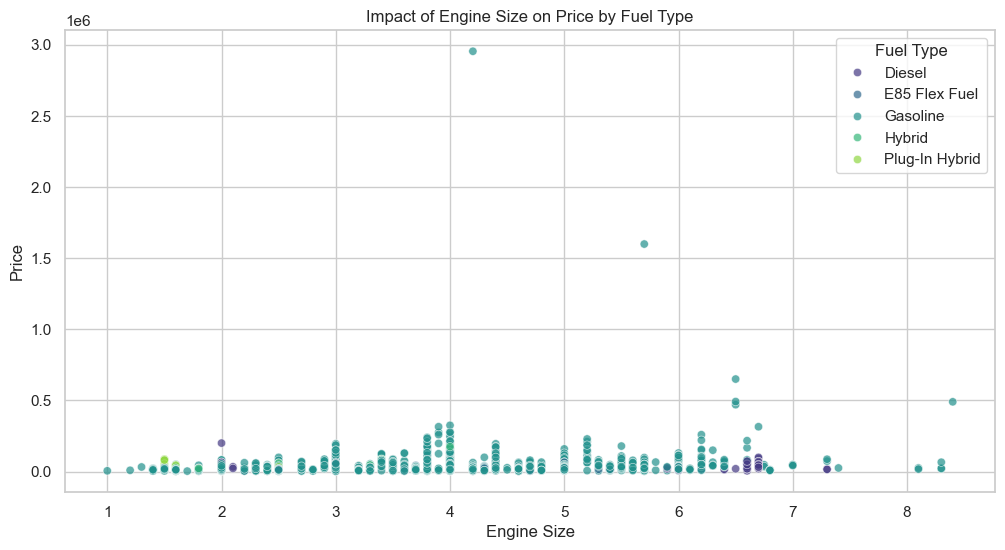

In [498]:
# Analyze price distribution based on fuel type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fuel_type', y='price', palette='Set3')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Compare engine size vs. price
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='engine_size', y='price', hue='fuel_type', palette='viridis', alpha=0.7)
plt.title('Impact of Engine Size on Price by Fuel Type')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()


<span style="color:#00ffff">Price Distribution by Fuel Type</span>

<span style="color:#ff00ff">Diesel and E85 Flex Fuel:</span> Both show a narrow price range with minimal variability and a few minor outliers.

<span style="color:#ff00ff">Gasoline:</span> Displays the widest price range with multiple outliers, indicating significant price fluctuation due to diverse models (e.g., budget and luxury cars).

<span style="color:#ff00ff">Hybrid and Plug-in Hybrid:</span> Both have a more stable price distribution with fewer outliers, indicating consistent pricing within these fuel types.

<span style="color:#00ffff">Price Distribution by engine size</span>

<span style="color:#ff00ff">Positive Correlation with Outliers:</span>There is a general trend where larger engine sizes tend to have higher prices, but there are notable outliers where some vehicles with smaller engines have high prices and vice versa.

<span style="color:#ff00ff">Price Distribution: </span>Most vehicles are priced below $500,000, but a few high-end vehicles with large engines exceed $2,000,000.

<span style="color:#ff00ff">Concentration of Data Points:</span>The majority of vehicles have engine sizes between 2.0 and 4.0 liters, with prices clustering below $100,000.


### <span style="color:#00ff00">2. Analyzing the Impact of Car Condition and Features</span>


<span style="color:#00ffff">Accident & Clean Title Influence on Price</span>


* Analyze if cars with accidents or without a clean title have consistently
lower prices.
* Check if certain brands or models with accidents have significantly lower
prices than others.

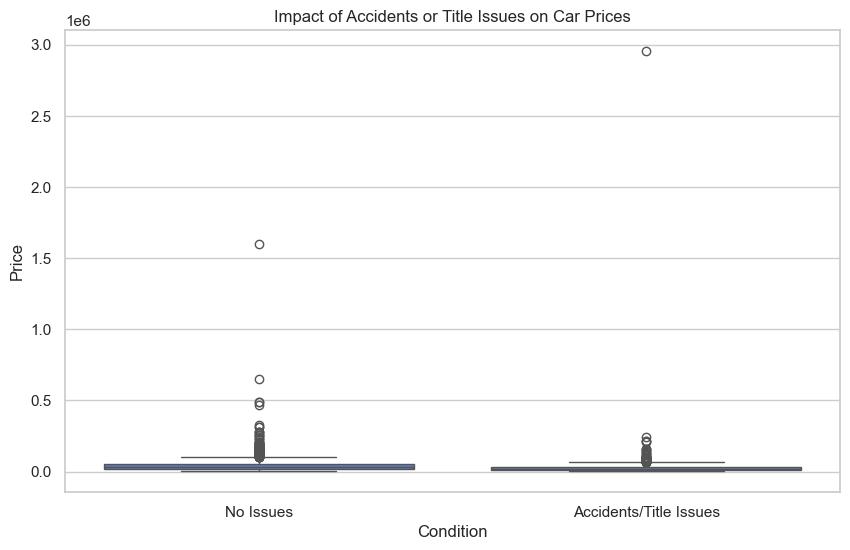

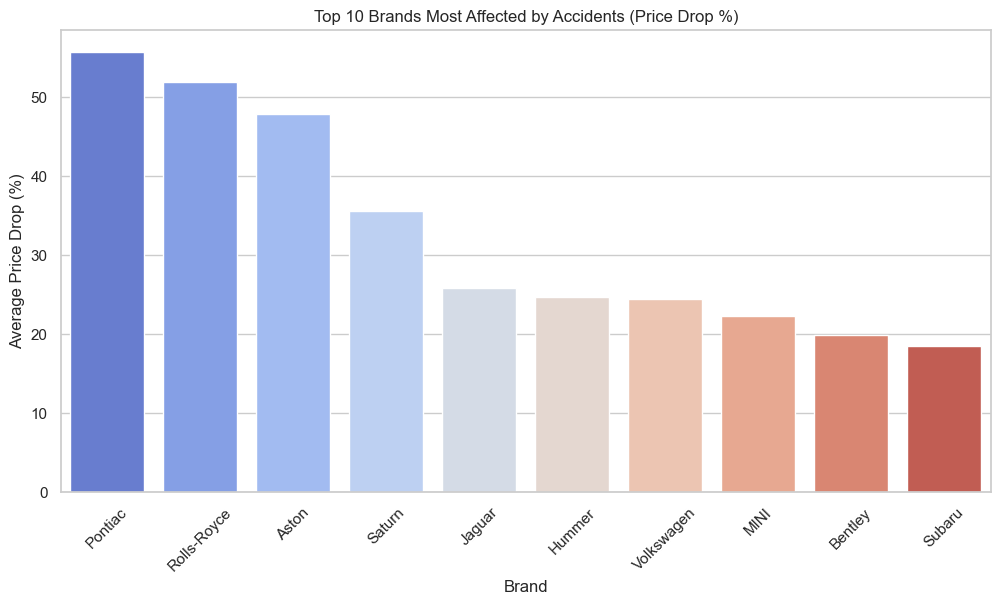

In [499]:
# Ensure accident and clean_title are binary (1 = Yes, 0 = No)
df['has_issue'] = (df['accident'] == 1) | (df['clean_title'] == 0)

# Boxplot to visualize price differences
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['has_issue'], y=df['price'])
plt.xticks([0, 1], ['No Issues', 'Accidents/Title Issues'])
plt.title('Impact of Accidents or Title Issues on Car Prices')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

df['has_accident'] = df['accident'] == 1

# Group by brand and model, then calculate median prices for cars with and without accidents
brand_model_price = df.groupby(['brand', 'model', 'has_accident'])['price'].median().reset_index()

# Pivot data to compare prices side by side
price_diff = brand_model_price.pivot(index=['brand', 'model'], columns='has_accident', values='price')

# Rename columns
price_diff.columns = ['No_Accident_Price', 'Accident_Price']

# Calculate price drop percentage
price_diff['Price_Drop_%'] = ((price_diff['No_Accident_Price'] - price_diff['Accident_Price']) / price_diff['No_Accident_Price']) * 100

# Drop rows with missing values
price_diff.dropna(inplace=True)

# Sort by highest price drop
price_diff_sorted = price_diff.sort_values(by='Price_Drop_%', ascending=False)

# Visualize the Impact of Accidents by Brand
plt.figure(figsize=(12, 6))
top_brands = price_diff_sorted.groupby('brand')['Price_Drop_%'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=top_brands.index, y=top_brands.values, palette="coolwarm")
plt.title('Top 10 Brands Most Affected by Accidents (Price Drop %)')
plt.xlabel('Brand')
plt.ylabel('Average Price Drop (%)')
plt.xticks(rotation=45)
plt.show()


#### <span style="color:#00ffff">Observations:</span>


<span style="color:#ff00ff">Impact of Accidents or Title Issues on Car Prices (Box Plot)</span>


* Cars with accidents or title issues tend to have lower median prices compared to those without issues.
* There are a few high-priced outliers in both categories, but the general trend shows a decrease in price.

<span style="color:#ff00ff">Top 10 Brands Most Affected by Accidents (Bar Chart)</span>


* Pontiac, Rolls-Royce, and Aston Martin experience the highest price drops due to accidents (~50% or more).
* Luxury brands like Jaguar, Bentley, and Rolls-Royce still experience significant depreciation despite their premium market positioning.
* Subaru and Volkswagen show relatively smaller price drops, indicating they might retain value better even after an accident.

<span style="color:#00ffff">Transmission Type Impact on Price</span>

* Compare price between automatic and manual transmission types for
different brands and models.
* Identify if certain transmission types show price discrepancies.

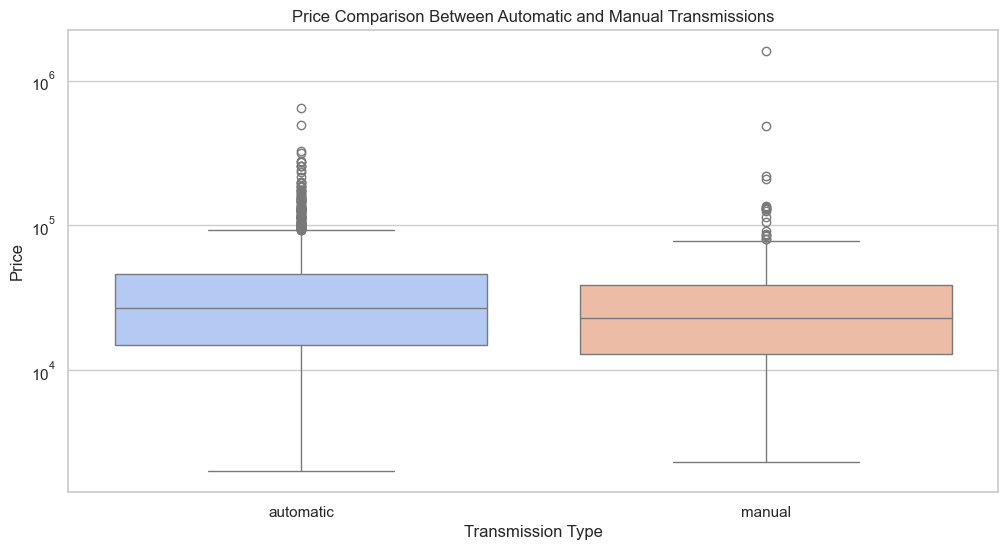

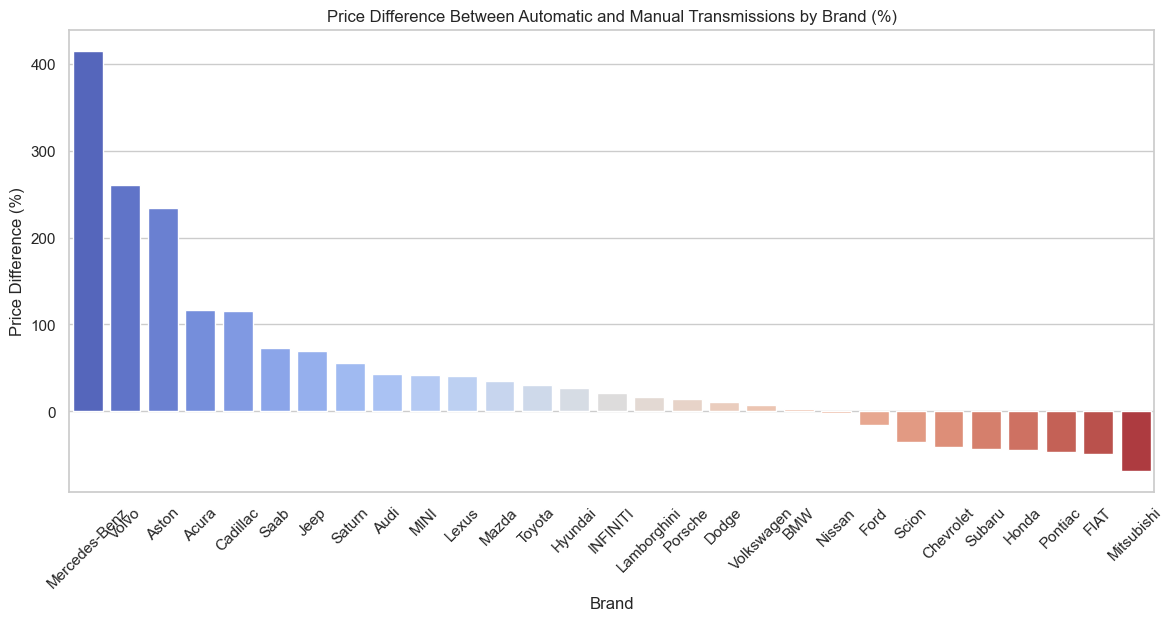

In [500]:
# Ensure transmission column is formatted properly
df['transmission'] = df['transmission'].str.lower()  # Normalize case

# Filter only automatic and manual transmissions
df = df[df['transmission'].isin(['automatic', 'manual'])]

# Boxplot: Price Distribution by Transmission Type
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['transmission'], y=df['price'], palette="coolwarm")
plt.title("Price Comparison Between Automatic and Manual Transmissions")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.yscale('log')  # Log scale to handle price variations
plt.show()

# Grouping by brand and transmission type to compute median price
brand_trans_price = df.groupby(['brand', 'transmission'])['price'].median().unstack()

# Calculate price discrepancy percentage
brand_trans_price['Price_Difference_%'] = ((brand_trans_price['automatic'] - brand_trans_price['manual']) / brand_trans_price['manual']) * 100

# Drop missing values and sort by price difference
brand_trans_price.dropna(inplace=True)
brand_trans_price_sorted = brand_trans_price.sort_values(by='Price_Difference_%', ascending=False)

# Barplot: Price Difference Between Automatic and Manual by Brand
plt.figure(figsize=(14, 6))
sns.barplot(x=brand_trans_price_sorted.index, y=brand_trans_price_sorted['Price_Difference_%'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Price Difference Between Automatic and Manual Transmissions by Brand (%)")
plt.xlabel("Brand")
plt.ylabel("Price Difference (%)")
plt.show()


<span style="color:#ff00ff">Price Comparison Between Automatic and Manual Transmissions (Boxplot)</span>


* The median price for automatic vehicles appears slightly higher than for manual vehicles.
* Both categories exhibit a wide range of prices, with manual vehicles having some extremely high outliers.
* Price Difference Between Automatic and Manual Transmissions by Brand (Bar Chart)
* Brands like Mercedes-Benz, Aston Martin, and Acura show a much higher price difference for automatic transmission compared to manual.
* On the other hand, brands like Mitsubishi, FIAT, and Pontiac show a negative price difference, indicating that manual transmission vehicles are more expensive than their automatic counterparts.
* The difference in pricing is more pronounced for luxury and premium brands.



### <span style="color:#00ff00">3. Color & Cosmetic Features</span>


<span style="color:#00ffff">External and Internal Color Impact on Price</span>


* Compare prices based on ext col and int col to see if color preferences
(e.g., black, white) lead to higher prices.
* Analyze if specific color combinations (exterior and interior) have higher
resale values.

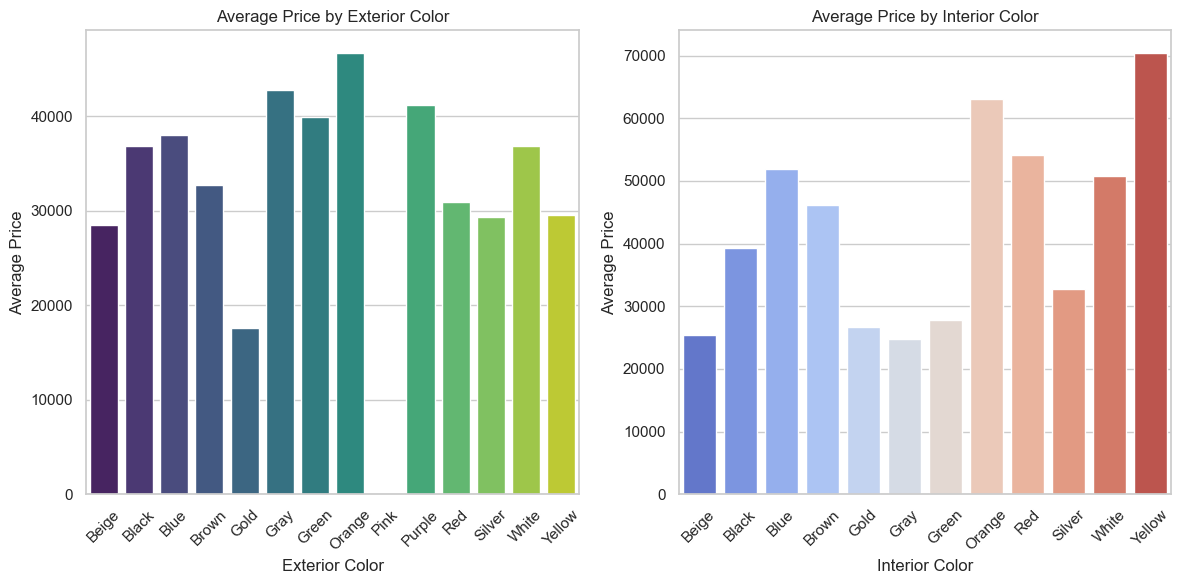

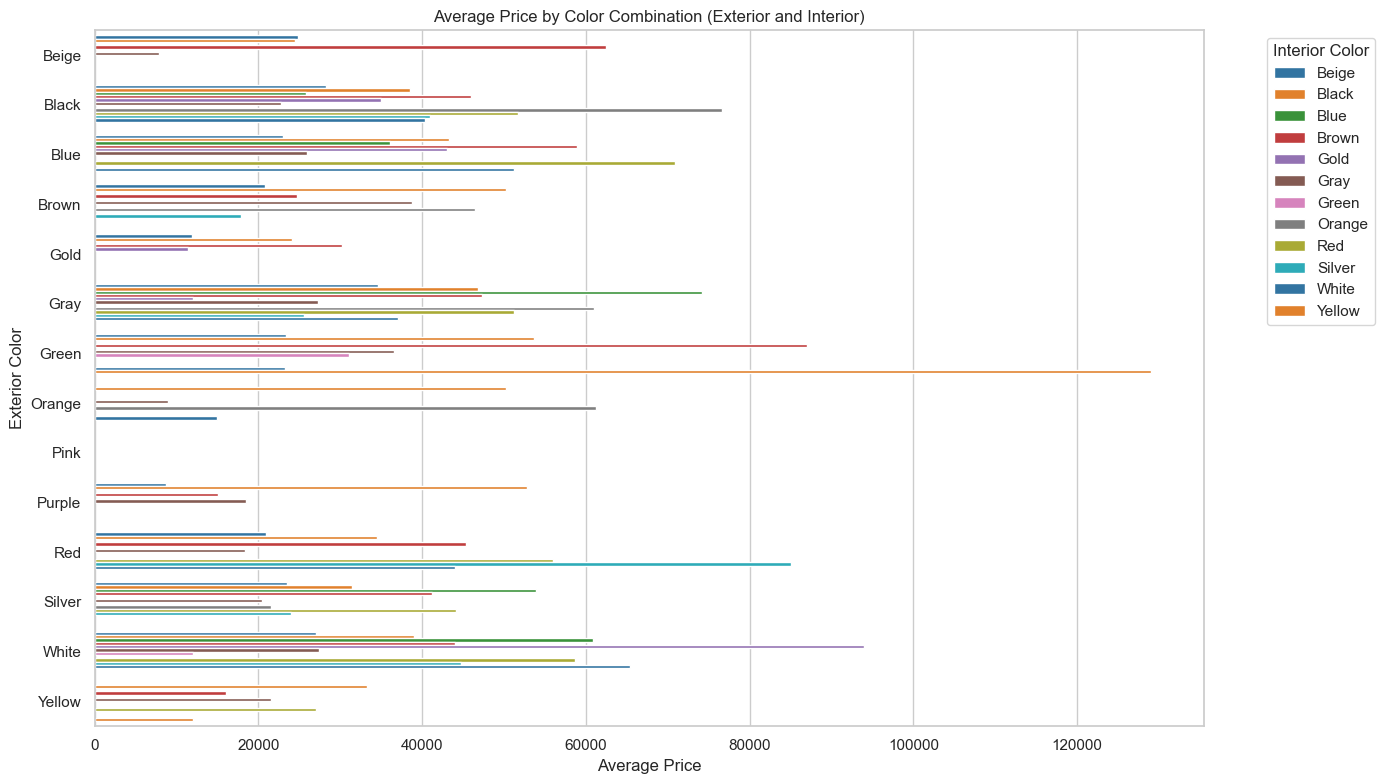

In [501]:
# Group by exterior color and calculate average price
ext_color_prices = df.groupby('ext_col')['price'].mean().sort_values(ascending=False)

# Group by interior color and calculate average price
int_color_prices = df.groupby('int_col')['price'].mean().sort_values(ascending=False)

# Group by exterior and interior color combinations and calculate average price
color_combination_prices = (
    df.groupby(['ext_col', 'int_col'])['price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualization
plt.figure(figsize=(12, 6))

# Exterior color impact on price
plt.subplot(1, 2, 1)
sns.barplot(x=ext_color_prices.index, y=ext_color_prices.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Price by Exterior Color')
plt.xlabel('Exterior Color')
plt.ylabel('Average Price')

# Interior color impact on price
plt.subplot(1, 2, 2)
sns.barplot(x=int_color_prices.index, y=int_color_prices.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Price by Interior Color')
plt.xlabel('Interior Color')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()

# Visualizing color combination impact on price
plt.figure(figsize=(14, 8))
sns.barplot(
    data=color_combination_prices,
    x='price',
    y='ext_col',
    hue='int_col',
    palette='tab10'
)
plt.title('Average Price by Color Combination (Exterior and Interior)')
plt.xlabel('Average Price')
plt.ylabel('Exterior Color')
plt.legend(title='Interior Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<span style="color:#00ffff">Observations:</span>


<span style="color:#ff00ff">Color Impact on Price:</span>
Certain color combinations may influence the average price of vehicles, with some colors potentially commanding higher prices.

<span style="color:#ff00ff">Price Range:</span>
The average prices span a wide range, indicating that color preferences can significantly affect vehicle valuation.

<span style="color:#ff00ff">Popular Colors:</span>
Colors like Black, White, and Silver are commonly listed, suggesting they might be popular choices among consumers.

### <span style="color:#00ff00">4. Model Year & Age of the Car</span>


<span style="color:#00ffff">Car Price Depreciation by Year</span>

* Analyze how model year impacts the price of a car, especially focusing on
depreciation trends over time.
* Check if older models (e.g., >10 years) consistently have lower prices for
the same brand.

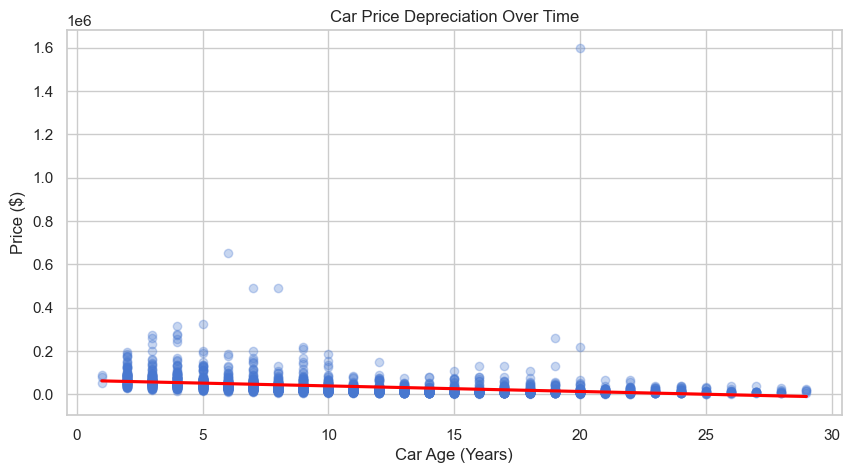

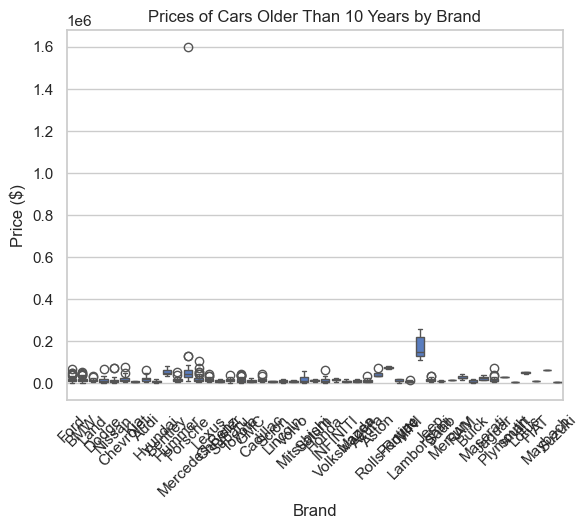

In [502]:
df['Car Age'] = 2025 - df['model_year']  # Assuming analysis in 2025
plt.figure(figsize=(10, 5))
sns.regplot(x=df['Car Age'], y=df['price'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Car Price Depreciation Over Time")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price ($)")
plt.show()

df_old = df[df['Car Age'] > 10]
sns.boxplot(x=df_old['brand'], y=df_old['price'])
plt.xticks(rotation=45)
plt.title("Prices of Cars Older Than 10 Years by Brand")
plt.xlabel("Brand")
plt.ylabel("Price ($)")
plt.show()




<span style="color:#ff00ff">Car Price Depreciation Over Time (First Graph)</span>


* The scatter plot shows a clear downward trend in car prices as they age, with the red regression line confirming depreciation over time.
* While most cars lose significant value over the years, there are some outliers where certain cars retain or even increase in value (likely luxury or collector cars).
* The depreciation rate appears steepest in the first few years, suggesting that newer cars lose value faster initially before stabilizing.

<span style="color:#ff00ff">Prices of Cars Older Than 10 Years by Brand (Second Graph)</span>


* The box plot highlights price variations among different brands for cars older than 10 years.
* Most brands show low median prices, indicating that older cars generally have low resale value.
* However, luxury brands like Rolls-Royce, Lamborghini, and Mercedes-Benz show significantly higher price ranges, suggesting that premium brands retain more value over time.

### <span style="color:#00ff00">5. Feature Engineering for Price Prediction </span>


<span style="color:#00ffff">Price per Mile:  </span>

* Create a price_per_mile = price / mileage feature to check for pricing inefficiency for cars with low mileage.

<span style="color:#00ffff">Categorize Engine by Size:</span>

* Categorize cars into small, medium, large engine sizes and analyze how engine size categories affect the price.


In [503]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'horsepower',
       'engine_size', 'cylinders', 'has_issue', 'has_accident', 'Car Age'],
      dtype='object')

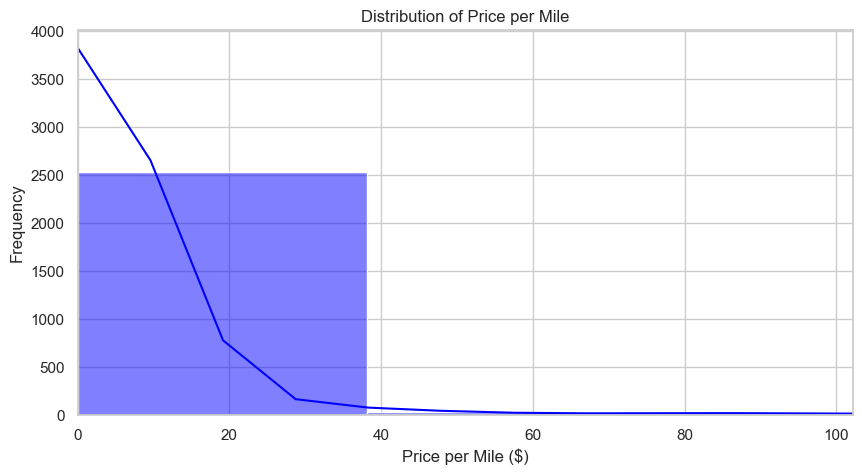

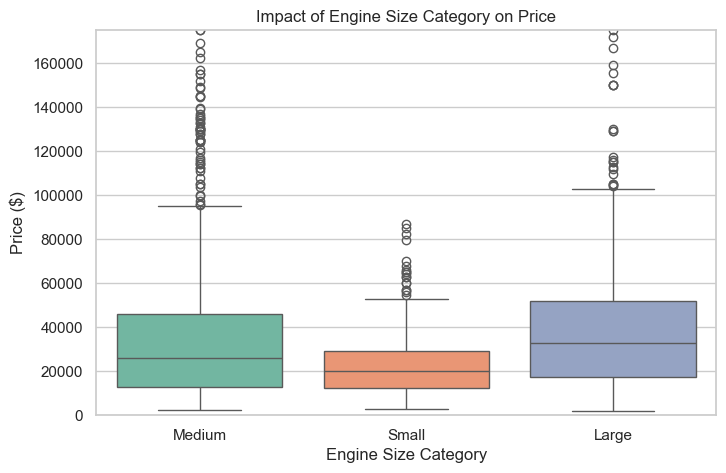

In [504]:
# Feature 1: Price per Mile Calculation
df['price_per_mile'] = df['price'] / df['milage']

# Feature 2: Categorizing Engine Size
def categorize_engine(engine_size):
    if engine_size <= 2.0:
        return "Small"
    elif 2.0 < engine_size <= 4.0:
        return "Medium"
    else:
        return "Large"

df['engine_category'] = df['engine_size'].apply(categorize_engine)

# Visualization 1: Distribution of Price Per Mile
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_mile'], bins=50, kde=True, color="blue")
plt.xlim(0, df['price_per_mile'].quantile(0.99))  # Remove extreme outliers for better visualization
plt.xlabel("Price per Mile ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Price per Mile")
plt.show()

# Visualization 2: Box Plot of Price by Engine Size Category
plt.figure(figsize=(8, 5))
sns.boxplot(x="engine_category", y="price", data=df, palette="Set2")
plt.ylim(0, df['price'].quantile(0.99))  # Remove extreme outliers for better readability
plt.xlabel("Engine Size Category")
plt.ylabel("Price ($)")
plt.title("Impact of Engine Size Category on Price")
plt.show()

<span style="color:#ff00ff">Distribution of Price per Mile: </span>

* The first graph shows that the majority of prices per mile are concentrated at the lower end of the scale, with a steep decline as the price increases. This suggests that most trips are relatively inexpensive per mile, while higher prices are much less frequent.

<span style="color:#ff00ff">Impact of Engine Size on Price: </span>

* The second graph indicates that vehicles with larger engines tend to have higher price variability, with more outliers at higher prices. Small-engine vehicles generally have lower prices, while medium and large-engine vehicles show a broader range. This confirms that larger engine sizes are associated with higher car prices, though there is a significant overlap across categories.









In [505]:
df['model'].nunique()

1371

<span style="color:#00ff00">since model feature has 1371 no of unique inputs this will large no of coulumns during one hot encoding so we drop it</span>


In [506]:
df.drop(columns=['model'],inplace=True)

In [507]:
df.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,engine_size,cylinders,has_issue,has_accident,Car Age,price_per_mile,engine_category
0,Ford,2013,51000,E85 Flex Fuel,automatic,Black,Black,1,1,10300,300.0,3.7,6,True,True,12,0.201961,Medium
3,INFINITI,2015,88900,Hybrid,automatic,Black,Black,0,1,15500,354.0,3.5,6,False,False,10,0.174353,Medium
6,Audi,2017,84000,Gasoline,automatic,Blue,Black,0,1,31000,292.0,2.0,4,False,False,8,0.369048,Small
7,BMW,2001,242000,Gasoline,automatic,Green,Green,0,1,7300,282.0,4.4,8,False,False,24,0.030165,Large
8,Lexus,2021,23436,Gasoline,automatic,Black,Black,0,1,41927,311.0,3.5,6,False,False,4,1.789000,Medium


In [508]:
df.isnull().sum()

brand              0
model_year         0
milage             0
fuel_type          0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title        0
price              0
horsepower         0
engine_size        0
cylinders          0
has_issue          0
has_accident       0
Car Age            0
price_per_mile     0
engine_category    0
dtype: int64

### <span style="color:#ffff00">Performing One Hot Encoding on Categorical Columns</span>

In [509]:
categorical_columns = ['brand' , 'fuel_type', 'transmission', 'ext_col', 'int_col','engine_category']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\nData after one-hot encoding:")
print(data_encoded.head())



Data after one-hot encoding:
   model_year  milage  accident  clean_title  price  horsepower  engine_size  \
0        2013   51000         1            1  10300       300.0          3.7   
3        2015   88900         0            1  15500       354.0          3.5   
6        2017   84000         0            1  31000       292.0          2.0   
7        2001  242000         0            1   7300       282.0          4.4   
8        2021   23436         0            1  41927       311.0          3.5   

   cylinders  has_issue  has_accident  ...  int_col_Gold  int_col_Gray  \
0          6       True          True  ...         False         False   
3          6      False         False  ...         False         False   
6          4      False         False  ...         False         False   
7          8      False         False  ...         False         False   
8          6      False         False  ...         False         False   

   int_col_Green  int_col_Orange  int_col_Re

## <span style="color:#ffff00">Importing necessary libraries required for training a model </span>


In [510]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


## <span style="color:#ffff00">Selecting Top Features Based on Importance</span>

In [511]:

# Defining features (X) and target variable (y)
X = data_encoded.drop(['price'], axis=1)
y = data_encoded['price']

# Feature selection using feature importance from Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Get feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Select top 10 features based on importance
top_features = feature_importance_df['Feature'].head(10).values
X_selected = X[top_features]

print("\nTop 10 selected features:")
print(top_features)



Top 10 selected features:
['price_per_mile' 'horsepower' 'milage' 'brand_Porsche' 'Car Age'
 'model_year' 'brand_Lamborghini' 'engine_size' 'ext_col_Gray' 'cylinders']


## <span style="color:#ffff00">Performing Train Test Splitting</span>

In [512]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


## <span style="color:#ffff00">Training The Model and Predicting the Data</span>

In [513]:

# Train the final model using Random Forest Regressor
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train, y_train)

# Predict on test data
y_pred = final_model.predict(X_test)


## <span style="color:#ffff00">Evaluating Model Performance</span>

In [514]:

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Model Evaluation:
Mean Absolute Error (MAE): 3376.2473988439306
Mean Squared Error (MSE): 106343653.1428944
Root Mean Squared Error (RMSE): 10312.305908132012
R-squared (R²): 0.9163566830299088


## <span style="color:#ffff00">Visualizing Selected Features</span>

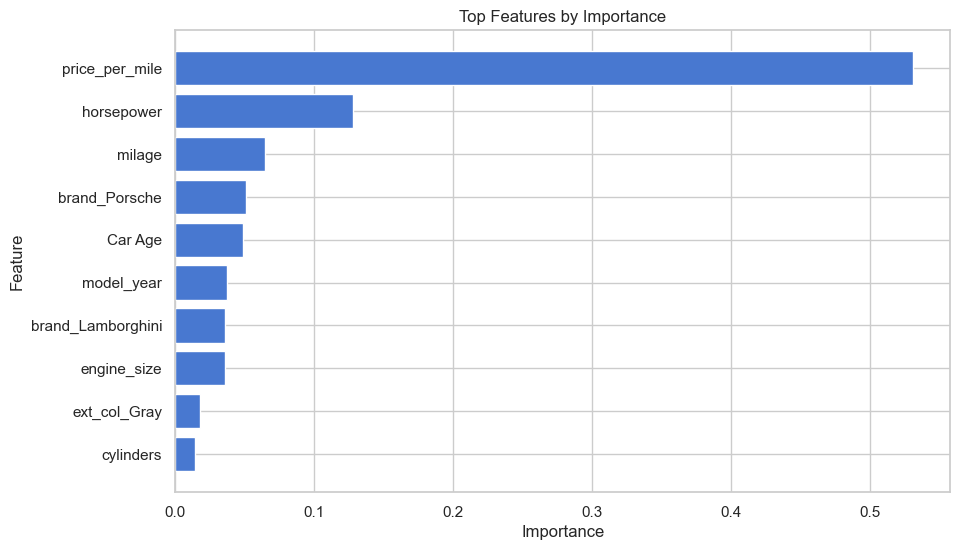

In [515]:

# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], feature_importance_df['Importance'].head(10)[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features by Importance')
plt.show()


## <span style="color:#ffff00">Residual Plot to visualize prediction made by the model</span>

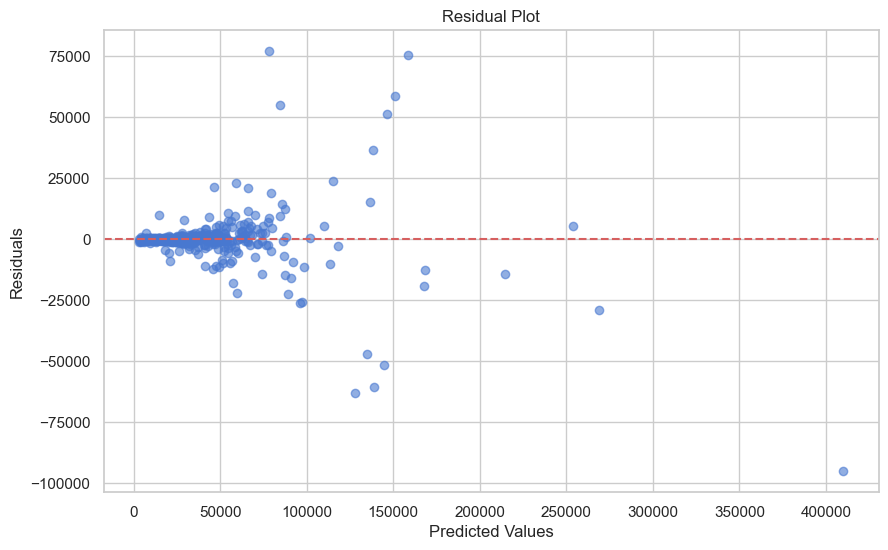

In [516]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

## <span style="color:#ffff00">Comparing Test and Predicted data</span>

<span style="color:#ff00ff">Here first column is test data and the second columns represent the data predicted by the forest regressor model </span>

In [517]:
list(zip(y_test,y_pred))

[(32500, np.float64(32613.71)),
 (99750, np.float64(87263.15)),
 (19999, np.float64(19947.04)),
 (49000, np.float64(48200.57)),
 (5200, np.float64(5511.78)),
 (20500, np.float64(20435.74)),
 (66000, np.float64(64337.15)),
 (13500, np.float64(13346.76)),
 (44000, np.float64(41329.64)),
 (17500, np.float64(18220.01)),
 (24350, np.float64(24885.67)),
 (47995, np.float64(46871.35)),
 (13500, np.float64(13770.89)),
 (18200, np.float64(18305.13)),
 (28900, np.float64(30383.08)),
 (47999, np.float64(56815.97)),
 (99750, np.float64(85449.73)),
 (46500, np.float64(47399.06)),
 (19500, np.float64(18672.75)),
 (27900, np.float64(27743.94)),
 (27000, np.float64(27800.75)),
 (48500, np.float64(47844.03)),
 (13000, np.float64(13564.7)),
 (20999, np.float64(22197.23)),
 (17000, np.float64(17500.27)),
 (40100, np.float64(38885.17)),
 (29000, np.float64(29034.06)),
 (64600, np.float64(64280.92)),
 (22000, np.float64(22479.03)),
 (18700, np.float64(19172.27)),
 (51900, np.float64(51310.15)),
 (175000, n

In [ ]:
#Testing on sample data
sample_data = {
    'price_per_mile': [0.201961],
    'horsepower': [300.0],
    'milage': [51000],
    'brand_Porsche': [0],
    'Car Age': [12],
    'model_year': [2013],
    'brand_Lamborghini': [0],
    'engine_size': [3.7],
    'ext_col_Gray': [0],
    'cylinders': [6]
}

# Converting the sample data to a DataFrame
sample_df = pd.DataFrame(sample_data)

sample_prediction = final_model.predict(sample_df)

print(f"Predicted price for the sample data: ${sample_prediction[0]:.2f}")

Predicted price for the sample data: $10468.78


## <span style="color:#ffff00">Using Liner Regression Model for comparison</span>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred2)

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")




Model Evaluation Metrics:
Mean Absolute Error (MAE): 12792.23670782695
Mean Squared Error (MSE): 405395070.710497
Root Mean Squared Error (RMSE): 20134.425015641667
R-squared (R2 Score): 0.6811413996471651


In [525]:
#Testing on sample data
sample_data = {
    'price_per_mile': [0.201961],
    'horsepower': [300.0],
    'milage': [51000],
    'brand_Porsche': [0],
    'Car Age': [12],
    'model_year': [2013],
    'brand_Lamborghini': [0],
    'engine_size': [3.7],
    'ext_col_Gray': [0],
    'cylinders': [6]
}

# Convert the sample data to a DataFrame
sample_df = pd.DataFrame(sample_data)

# Make a prediction using the trained model
sample_prediction = model.predict(sample_df)

print(f"Predicted price for the sample data: ${sample_prediction[0]:.2f}")

Predicted price for the sample data: $30569.45


## <span style="color:#ffff00">Conclusion</span>
* The Random Forest Regression model outperforms the Linear Regression model across all key metrics:
* It has a much higher R² score (92.33% vs. 69.75%).
* It achieves significantly lower error values (MSE and RMSE).